In [38]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import numpy as np

df = pd.DataFrame({'score': [70 ,50, 65 ,60, 75 ,67 ,74,
                            80 ,74 , 90, 70, 75, 65, 85,
                            148, 142, 140, 150, 160, 170, 155],
                    'group': np.repeat(['accountant', 'lawyer','programmer'],repeats= 7)})
df

,score,group
0,70,accountant
1,50,accountant
2,65,accountant
3,60,accountant
4,75,accountant
5,67,accountant
6,74,accountant
7,80,lawyer
8,74,lawyer
9,90,lawyer


In [39]:
tukey_test = pairwise_tukeyhsd(endog=df['score'],
                    groups=df['group'],
                    alpha=0.05)
print(tukey_test)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
accountant     lawyer  11.1429 0.0918 -1.5722 23.8579  False
accountant programmer  86.2857    0.0 73.5707 99.0007   True
    lawyer programmer  75.1429    0.0 62.4278 87.8579   True
------------------------------------------------------------


In [40]:
np.mean([45.5,64,57.5,52])

54.75

In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

### Задача 1
 Есть ли различие между процентным содержанием изотопов плутония? Используйте функции в Python
Провести предварительный разведочный анализ (проверку на нормальность и   равенство дисперсий*)

pu_238: 
 0.126, 0.133, 0.127, 0.156, 0.503, 0.113, 0.129, 0.124, 1.022, 1.412, 1.533, 1.534, 1.437, 1.439, 1.375, 1.153, 0.201, 0.176, 0.239, 0.102, 1.070, 0.851, 0.125, 0.142, 0.352, 0.351, 0.346, 0.217, 1.068, 1.171, 1.213, 1.226, 1.111, 0.183, 0.162, 0.113, 1.309, 1.638, 1.589, 1.411, 1.457, 0.397, 0.328, 0.242, 1.367

pu_239: 
75.804, 75.515, 75.175, 78.872, 73.317, 79.116, 75.751, 75.326, 63.287, 59.553, 58.688, 58.758, 59.728, 59.544, 59.877, 61.182, 78.244, 78.166, 74.254, 79.840,  62.455, 73.189, 75.968, 75.957, 72.885,72.907, 72.919, 76.089, 70.129, 69.273, 69.147, 68.294, 71.076, 75.714, 76.150, 77.845, 62.382, 60.112, 60.519, 61.585,   61.332, 72.291, 73.451, 74.888, 60.507

pu_240:
 21.204, 21.408, 21.668, 18.428, 20.223, 18.548, 21.162, 21.557, 24.493, 25.576, 25.719, 25.692, 25.146, 25.126, 25.128, 25.100, 18.488, 18.629, 21.515, 17.872, 24.656, 18.285,   20.794, 20.867, 21.718, 21.721, 21.713, 20.225, 18.573, 18.633, 18.640, 18.869, 18.122, 20.750, 20.345, 19.108, 22.754, 23.320, 23.128, 23.133, 23.239,  21.761, 21.429, 20.939, 23.603

pu_241: 2.180, 2.240, 2.305, 1.906, 4.128, 1.690, 2.260, 2.282, 6.990, 8.027, 8.279, 8.261, 8.377, 8.569, 8.428, 7.802, 2.351, 2.365, 2.901, 1.674, 7.512,  5.597, 2.407, 2.341, 3.618, 3.601, 3.600, 2.556, 7.689, 8.300, 8.363, 8.826, 7.248, 2.488, 2.524, 2.275, 9.311, 9.972, 9.970, 9.339, 9.321, 3.836, 3.419, 2.875, 9.839


In [42]:
pu_238 = np.array([ 0.126, 0.133, 0.127, 0.156, 0.503, 0.113, 0.129, 0.124, 1.022, 1.412, 1.533, 1.534, 1.437,
 1.439, 1.375, 1.153, 0.201, 0.176, 0.239, 0.102, 1.070, 0.851, 0.125, 0.142, 0.352, 0.351, 0.346, 0.217, 1.068,
  1.171, 1.213, 1.226, 1.111, 0.183, 0.162, 0.113, 1.309, 1.638, 1.589, 1.411, 1.457, 0.397, 0.328, 0.242, 1.367])
pu_239 = np.array([75.804, 75.515, 75.175, 78.872, 73.317, 79.116, 75.751, 75.326, 63.287, 59.553, 58.688, 58.758,
                 59.728, 59.544, 59.877, 61.182, 78.244, 78.166, 74.254, 79.840,  62.455, 73.189, 75.968, 75.957,
                  72.885,72.907, 72.919, 76.089, 70.129, 69.273, 69.147, 68.294, 71.076,
                 75.714, 76.150, 77.845, 62.382, 60.112, 60.519, 61.585,   61.332, 72.291, 73.451, 74.888, 60.507])
pu_240 = np.array([21.204, 21.408, 21.668, 18.428, 20.223, 18.548, 21.162, 21.557, 24.493, 25.576, 25.719, 25.692,
              25.146, 25.126, 25.128, 25.100, 18.488, 18.629, 21.515, 17.872, 24.656, 18.285,
              20.794, 20.867, 21.718, 21.721, 21.713, 20.225, 18.573, 18.633, 18.640, 18.869,
              18.122, 20.750, 20.345, 19.108, 22.754, 23.320, 23.128, 23.133, 23.239,  21.761, 21.429, 20.939, 23.603])
pu_241 = np.array([2.180, 2.240, 2.305, 1.906, 4.128, 1.690, 2.260, 2.282, 6.990, 8.027, 8.279, 8.261,
                  8.377, 8.569, 8.428, 7.802, 2.351, 2.365, 2.901, 1.674, 7.512,  5.597, 2.407, 2.341, 3.618, 3.601, 3.600,
                  2.556, 7.689, 8.300, 8.363, 8.826, 7.248, 2.488, 2.524, 2.275, 9.311, 9.972, 9.970, 9.339, 9.321, 3.836, 3.419, 2.875, 9.839])

import scipy.stats as stats
# norm = stats.norm 
stats.shapiro(pu_238)

ShapiroResult(statistic=0.8199635744094849, pvalue=6.733238933520624e-06)

In [43]:
stats.shapiro(pu_239)

ShapiroResult(statistic=0.8647032380104065, pvalue=8.951310883276165e-05)

In [44]:
stats.shapiro(pu_240)

ShapiroResult(statistic=0.9316781759262085, pvalue=0.010755813680589199)

In [45]:
stats.shapiro(pu_241)

ShapiroResult(statistic=0.8336212635040283, pvalue=1.4246789760363754e-05)

Также для ненормально распределенных выборок можно использовать тест Левене для сравнения дисперсий

In [58]:
stats.levene(pu_238,pu_239,pu_240,pu_241)

LeveneResult(statistic=32.992225016706485, pvalue=5.701823714481597e-17)

Надежно показывает, что дисперсии сильно различаются и дисперсионный анализ неприменим.

Так как нормальность выборок не соблюдается, используем непараметрические тесты.

In [46]:
stats.kruskal(pu_238,pu_239, pu_240,pu_241)

KruskalResult(statistic=167.8178522154513, pvalue=3.76478949748032e-36)

Так как p-value маленькая, то отбрасываем нулевую гипотезу что выборки взяты из общей совокупности(с похожим средним),т.е. есть статистические различия между изотопами.

Задача 2				
Даны квартальные прибыли акции Johnson&Johnson с 1960-1980 гг
Есть ли различия прибыли между 4-мя кварталами?
Провести EDA (проверка на нормальность, проверка на однородность дисперсий с помощью Барлетт теста from scipy.stats import bartlett)
Учитывайте при выборе теста тот факт, что при сбалансированных данных (выборки одинакового объема), неоднородность дисперсий слабо влияет на результат)
						
JJ_1=np.array([0.71, 0.63, 0.85, 0.44, 0.61, 0.69, 0.92, 0.55, 0.72, 0.77, 0.92, 0.60, 0.83, 0.80, 1.00, 0.77, 0.92, 1.00, 1.24, 1.00, 1.16 ]) 
JJ_2=np.array([1.30, 1.45, 1.25, 1.26, 1.38, 1.86, 1.56, 1.53, 1.59, 1.83, 1.86, 1.53, 2.07, 2.34, 2.25, 2.16, 2.43, 2.70, 2.25, 2.79, 3.42 ]) 
JJ_3=np.array([3.69, 3.60, 3.60, 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58, 5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74, 7.83])
 JJ_4=np.array([6.12, 7.74, 8.91, 8.28, 6.84, 9.54, 10.26, 9.54, 8.73, 11.88, 12.06, 12.15, 8.91, 14.04, 12.96, 14.85, 9.99, 16.20, 14.67, 16.02, 11.61 ]) 


In [47]:
JJ_1=np.array([0.71, 0.63, 0.85, 0.44, 0.61, 0.69, 0.92, 0.55, 0.72, 0.77, 0.92, 0.60, 0.83, 0.80, 1.00, 0.77, 0.92, 1.00, 1.24, 1.00, 1.16 ]) 
JJ_2=np.array([1.30, 1.45, 1.25, 1.26, 1.38, 1.86, 1.56, 1.53, 1.59, 1.83, 1.86, 1.53, 2.07, 2.34, 2.25, 2.16, 2.43, 2.70, 2.25, 2.79, 3.42 ]) 
JJ_3=np.array([3.69, 3.60, 3.60, 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58, 5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74, 7.83])
JJ_4=np.array([6.12, 7.74, 8.91, 8.28, 6.84, 9.54, 10.26, 9.54, 8.73, 11.88, 12.06, 12.15, 8.91, 14.04, 12.96, 14.85, 9.99, 16.20, 14.67, 16.02, 11.61 ]) 

import pylab


stats.shapiro(JJ_1)

ShapiroResult(statistic=0.9837694764137268, pvalue=0.9688350558280945)

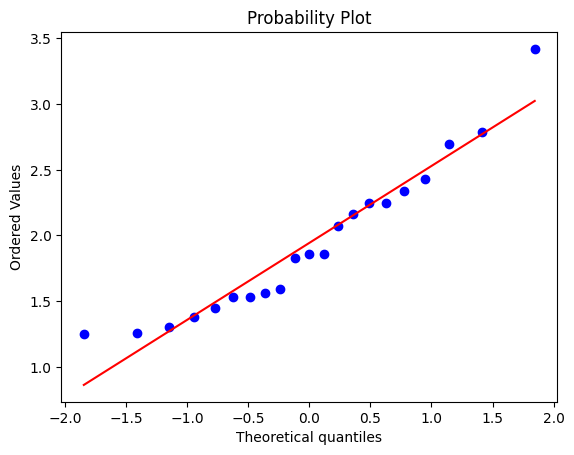

In [48]:
stats.shapiro(JJ_2)
stats.probplot(JJ_2,dist='norm',plot=pylab)
pylab.show()

In [49]:
stats.shapiro(JJ_3)

ShapiroResult(statistic=0.9523218274116516, pvalue=0.37654614448547363)

In [50]:
stats.shapiro(JJ_4)

ShapiroResult(statistic=0.9590807557106018, pvalue=0.49780404567718506)

In [51]:
stats.bartlett(JJ_1,JJ_2,JJ_3,JJ_4)

BartlettResult(statistic=109.62893110687119, pvalue=1.3188378332498392e-23)

Так как по Бартлету pvalue маленький ,  то дисперсии неоднородны между выборками. 

In [52]:
len(JJ_1) == len(JJ_2) == len(JJ_3) == len(JJ_4)

True

Но так как размеры выборок одинаковы, то продолжим дисперсионный анализ.

Проверим по криттерию Фишера

In [53]:
stats.f_oneway(JJ_1,JJ_2,JJ_3,JJ_4)

F_onewayResult(statistic=162.03157448390618, pvalue=6.813074435306209e-34)

Есть статистические различия между кварталами, так как pvalue  маленький

### задача 3
Провести post hoc tests к задаче 2
Между какими группами не обнаружено статистически значимых различий? 


In [54]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd


kvartals = pd.DataFrame({'profit': [ 0.71, 0.63, 0.85, 0.44, 0.61, 0.69, 0.92, 0.55, 0.72, 0.77, 0.92, 0.60, 0.83, 0.80, 1.00, 0.77, 0.92, 1.00, 1.24, 1.00, 1.16 ,
    1.30, 1.45, 1.25, 1.26, 1.38, 1.86, 1.56, 1.53, 1.59, 1.83, 1.86, 1.53, 2.07, 2.34, 2.25, 2.16, 2.43, 2.70, 2.25, 2.79, 3.42 ,
    3.69, 3.60, 3.60, 4.32, 4.32, 4.05, 4.86, 5.04, 5.04, 4.41, 5.58, 5.85, 6.57, 5.31, 6.03, 6.39, 6.93, 5.85, 6.93, 7.74, 7.83,
    6.12, 7.74, 8.91, 8.28, 6.84, 9.54, 10.26, 9.54, 8.73, 11.88, 12.06, 12.15, 8.91, 14.04, 12.96, 14.85, 9.99, 16.20, 14.67, 16.02, 11.61 ],
    'quarter': np.repeat(['q1','q2','q3','q4'],repeats=21)})

kvartals

,profit,quarter
0,0.71,q1
1,0.63,q1
2,0.85,q1
3,0.44,q1
4,0.61,q1
...,...,...
79,9.99,q4
80,16.20,q4
81,14.67,q4
82,16.02,q4


In [55]:
tukey_res = pairwise_tukeyhsd(endog = kvartals['profit'], groups =kvartals['quarter'],alpha=0.05)
print(tukey_res)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    q1     q2   1.1276 0.1282 -0.2087   2.464  False
    q1     q3     4.61    0.0  3.2737  5.9463   True
    q1     q4  10.1986    0.0  8.8622 11.5349   True
    q2     q3   3.4824    0.0   2.146  4.8187   True
    q2     q4    9.071    0.0  7.7346 10.4073   True
    q3     q4   5.5886    0.0  4.2522  6.9249   True
----------------------------------------------------


In [56]:
z_values = np.concatenate([JJ_1,JJ_2,JJ_3,JJ_4])
names = np.repeat(['q1','q2','q3','q4'],repeats=21)
simple_tukey= pairwise_tukeyhsd(endog = z_values, groups =names,alpha=0.05)

print(simple_tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
    q1     q2   1.1276 0.1282 -0.2087   2.464  False
    q1     q3     4.61    0.0  3.2737  5.9463   True
    q1     q4  10.1986    0.0  8.8622 11.5349   True
    q2     q3   3.4824    0.0   2.146  4.8187   True
    q2     q4    9.071    0.0  7.7346 10.4073   True
    q3     q4   5.5886    0.0  4.2522  6.9249   True
----------------------------------------------------


In [57]:
model = ols(formula='values ~ C(fA) * C(fB)', data=kvartals).fit()

PatsyError: Error evaluating factor: NameError: name 'fA' is not defined
    values ~ C(fA) * C(fB)
             ^^^^^